In [1]:
import gym
import d4rl # Import required to register environments
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

No module named 'flow'
No module named 'carla'
pybullet build time: Mar  7 2022 18:18:14


In [2]:
sns.set_style("ticks")
sns.set_context("paper", 1.5, {"lines.linewidth": 2})

In [3]:
def plot_correlogram(
    data_name="halfcheetah-expert-v2",
    action_obs_reward='actions',
    total_trajectory_len=10000,
    kmeans_pca='k-means',
    round_idx=2,
    n_clusters=10
    ):
    # load data
    env = gym.make(data_name)
    dataset = env.get_dataset()
    data = dataset[action_obs_reward]
    # select sub-actions
    data = data[:total_trajectory_len, :]

    if kmeans_pca == 'pca':
        if action_obs_reward in ['actions', 'observations']:
            feature = PCA(n_components=1).fit(data).transform(data)
        elif action_obs_reward == 'rewards':
            feature = data
        else:
            print('No such item')

        # round action
        feature = np.round(feature, round_idx)
    elif kmeans_pca == 'k-means':
        feature = KMeans(n_clusters=n_clusters).fit(data).fit_predict(data)
    else:
        print('No such method')
    
    auto_corrs = []
    for lag in tqdm(range(1, len(feature) - 1)):
        sequence = pd.Series(np.squeeze(feature))
        auto_corr = sequence.autocorr(lag)
        auto_corrs.append(auto_corr)
    
    # plot scatter
    # plt.figure(figsize=(20, 10))
    plt.stem(np.arange(1, len(feature) - 1), auto_corrs, use_line_collection=True)
    plt.title(data_name)
    
    # plot
    plt.xlabel(f'Distance b/w two data points')
    plt.ylabel(f'Autocorrelation')
    plt.show()

In [24]:
def plot_correlogram_vecor(
    data_name="halfcheetah-expert-v2",
    action_obs_reward='actions',
    offset=0,
    total_trajectory_len=1000
    ):
    # load data
    env = gym.make(data_name)
    dataset = env.get_dataset()
    data = dataset[action_obs_reward]
    # select sub-actions
    data = data[offset:offset + total_trajectory_len, :]
    
    auto_corrs = []
    for feature_id in tqdm(range(data.shape[1])):
        auto_corrs_feature = []
        feature = data[:, feature_id]
        for lag in range(data.shape[0]):
            sequence = pd.Series(np.squeeze(feature))
            auto_corr_feat = sequence.autocorr(lag)
            auto_corrs_feature.append(auto_corr_feat)
        auto_corrs.append(auto_corrs_feature)
    correlogram = np.mean(auto_corrs, axis = 0)
    
    # plot scatter
    # plt.figure(figsize=(20, 10))
    markerline, stemlines, baseline = plt.stem(np.arange(data.shape[0]), correlogram, use_line_collection=True)
    plt.setp(markerline, 'color', (0.372, 0.537, 0.537))
    plt.setp(stemlines, 'color', (0.372, 0.537, 0.537))
    plt.setp(baseline, 'color', (0.627, 0.352, 0.470))
    
    plt.title(data_name + ': ' + action_obs_reward)
    
    # plot
    plt.xlabel(f'Time Lag')
    plt.ylabel(f'Autocorrelation')

    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.savefig(f'figs/correlogram_{data_name}_{action_obs_reward}_{offset}_{total_trajectory_len}.pdf')
    
    plt.show()

# Correlogram(vector)

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.18it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


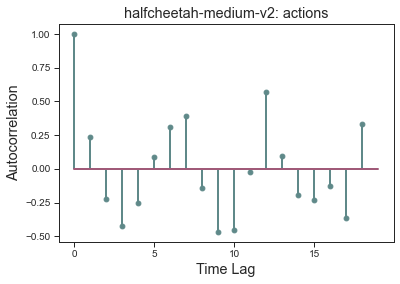

In [25]:
plot_correlogram_vecor(
    data_name="halfcheetah-medium-v2",
    action_obs_reward='actions',
    offset=0,
    total_trajectory_len=20
    )

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.91it/s]


  0%|          | 0/3 [00:00<?, ?it/s]

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


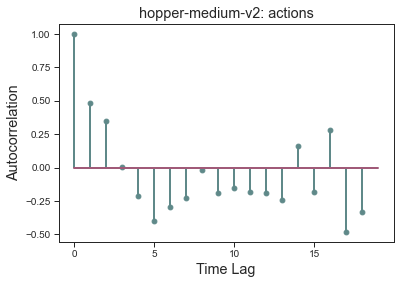

In [26]:
plot_correlogram_vecor(
    data_name="hopper-medium-v2",
    action_obs_reward='actions',
    offset=0,
    total_trajectory_len=20
    )

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.25it/s]


  0%|          | 0/6 [00:00<?, ?it/s]

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


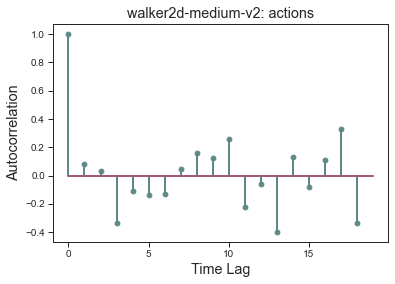

In [27]:
plot_correlogram_vecor(
    data_name="walker2d-medium-v2",
    action_obs_reward='actions',
    offset=0,
    total_trajectory_len=20
    )

## Plot

### Gym-MuJoCo

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 13.94it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

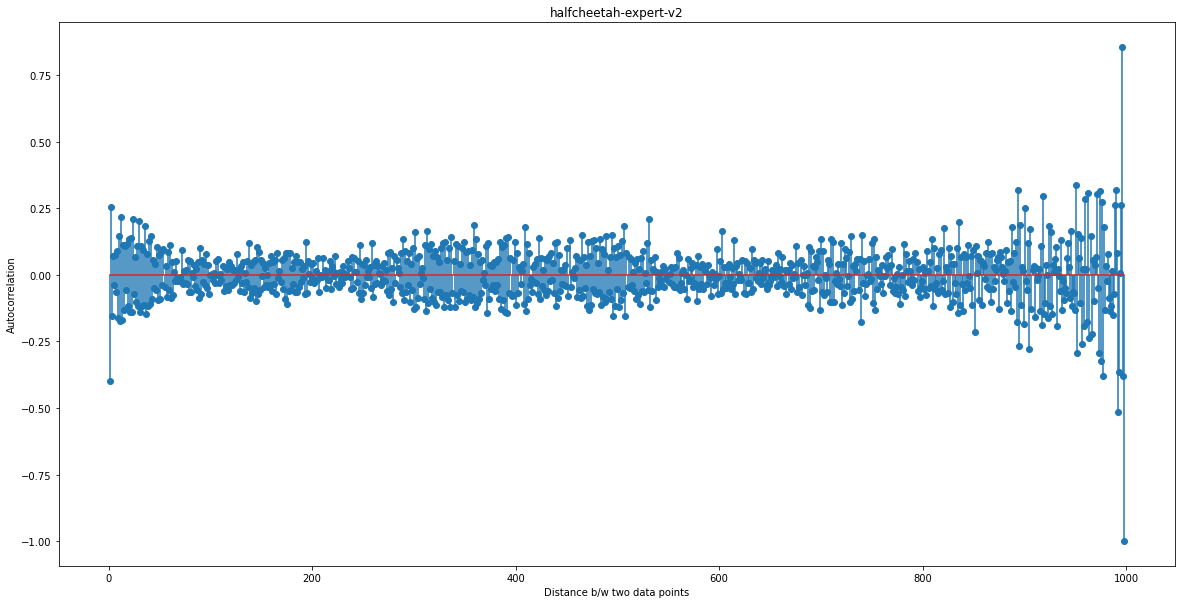

In [20]:
plot_correlogram(
    data_name='halfcheetah-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.04it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

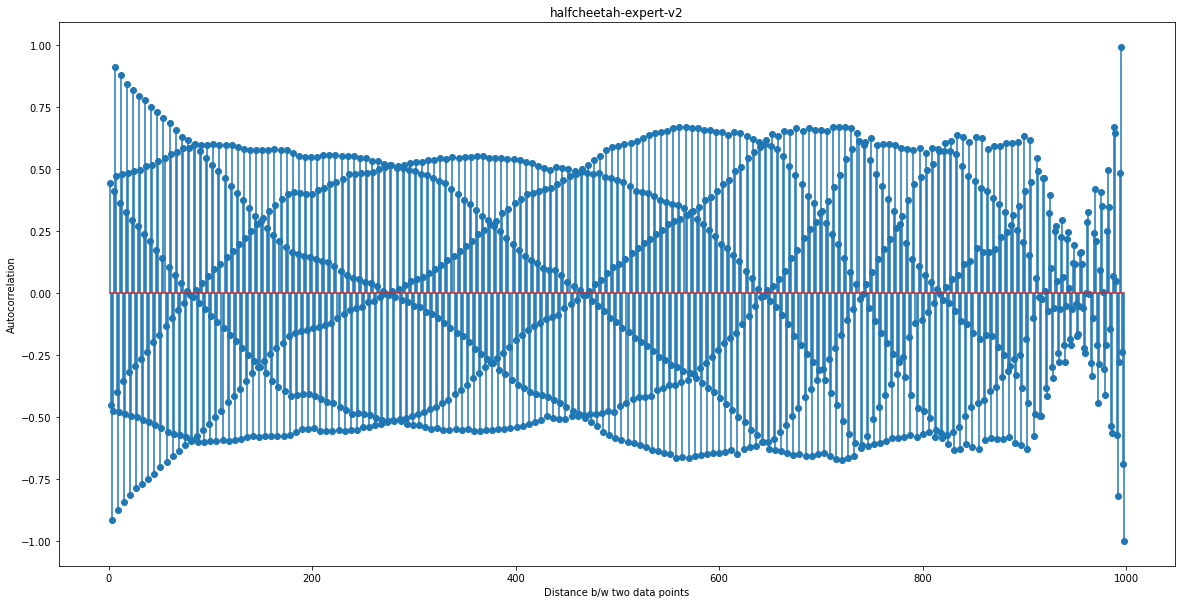

In [21]:
plot_correlogram(
    data_name='halfcheetah-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 13.16it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

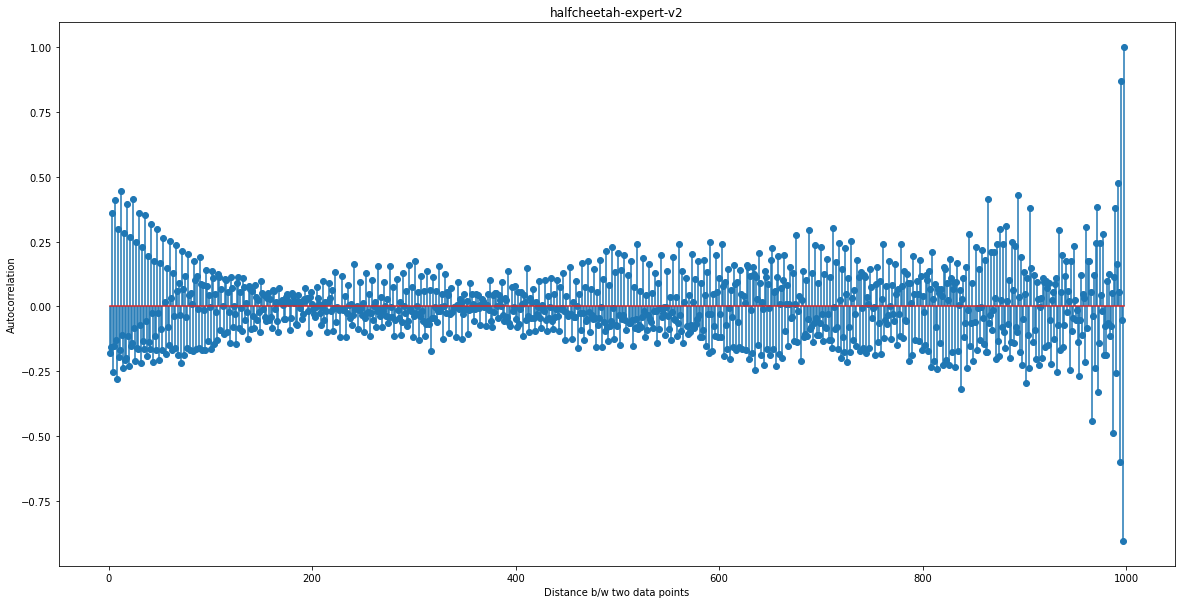

In [23]:
plot_correlogram(
    data_name='halfcheetah-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='observations')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.19it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

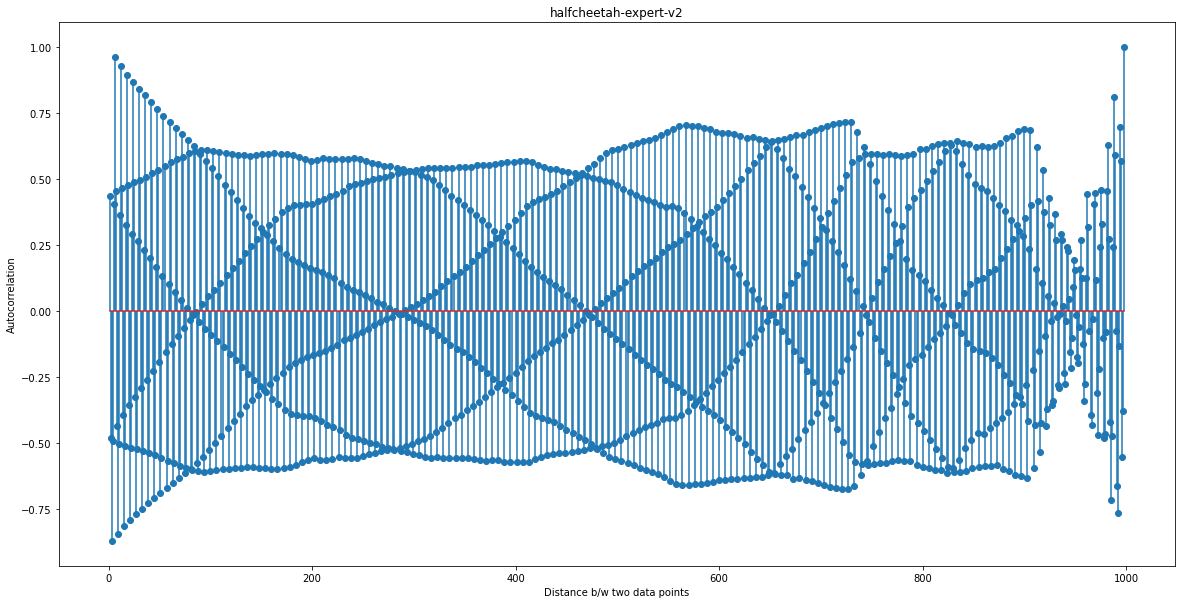

In [24]:
plot_correlogram(
    data_name='halfcheetah-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='observations')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 21.46it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

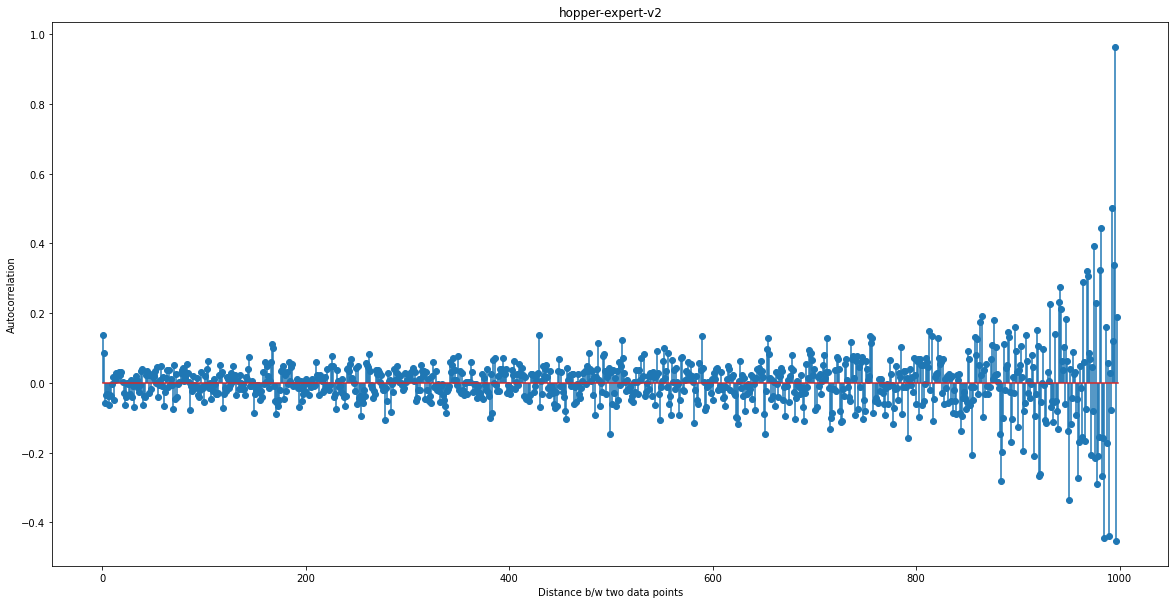

In [25]:
plot_correlogram(
    data_name='hopper-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 21.73it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

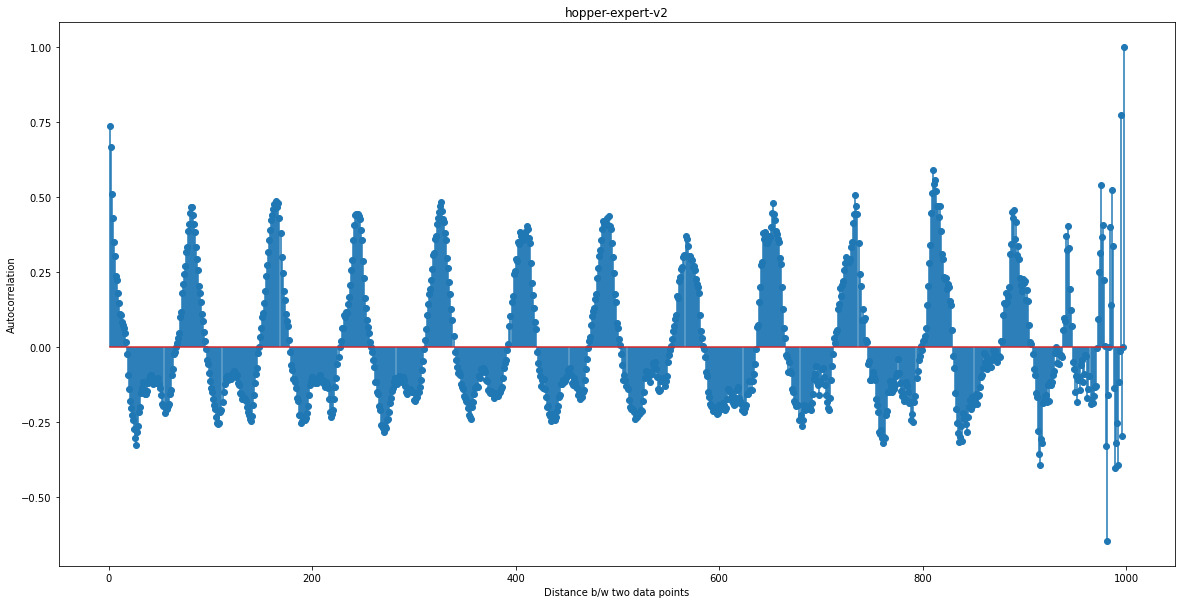

In [26]:
plot_correlogram(
    data_name='hopper-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='actions')

load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.54it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

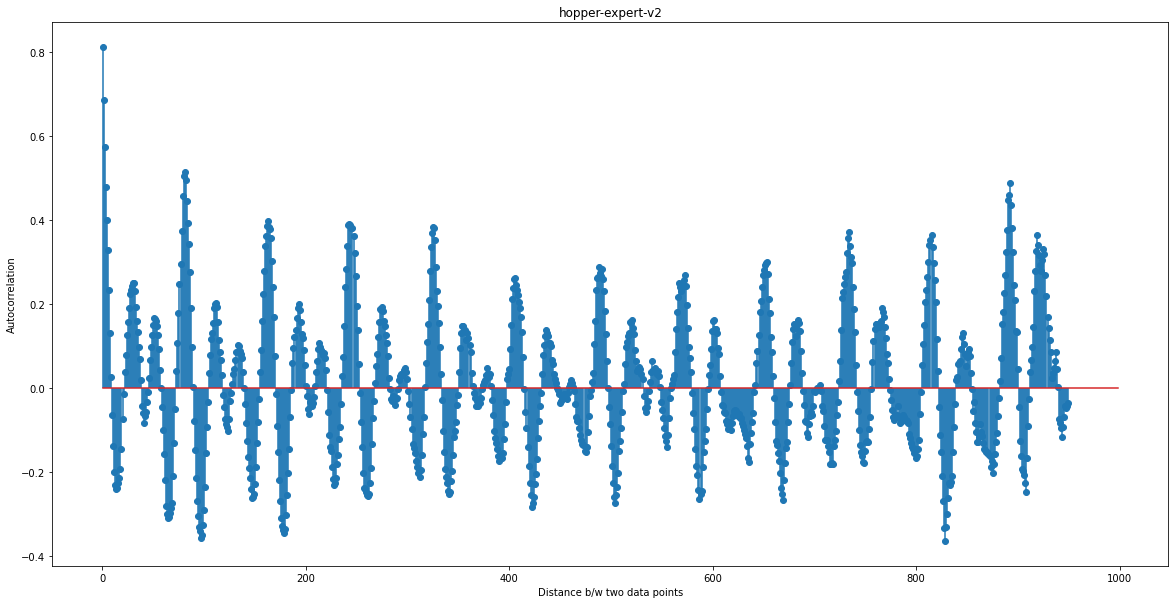

In [28]:
plot_correlogram(
    data_name='hopper-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='observations')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 21.57it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

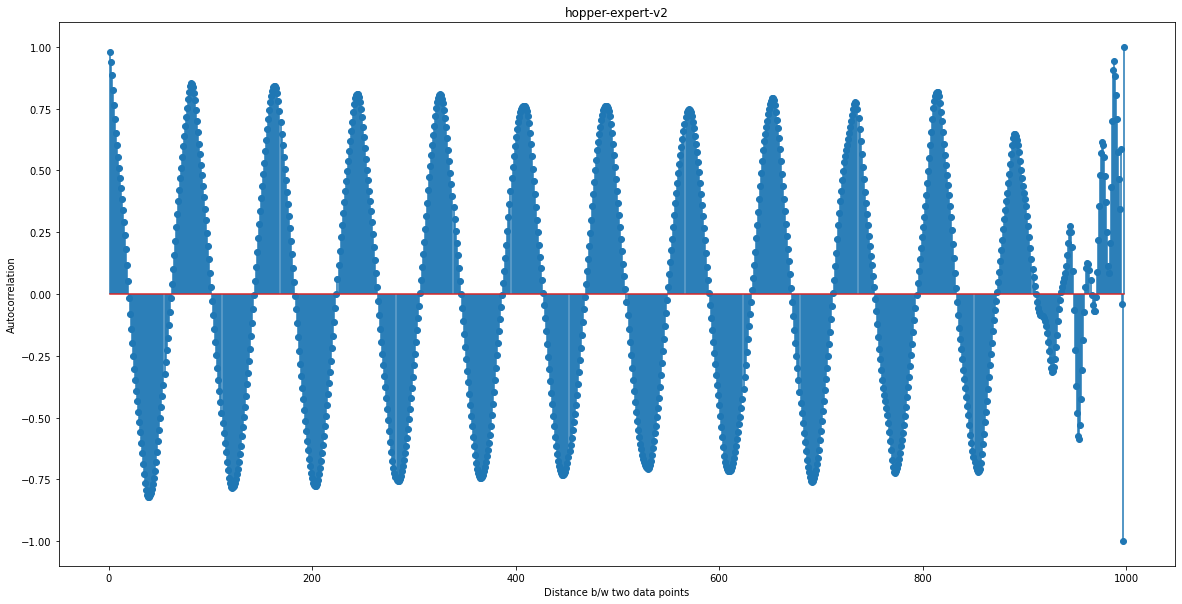

In [29]:
plot_correlogram(
    data_name='hopper-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='observations')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 13.72it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

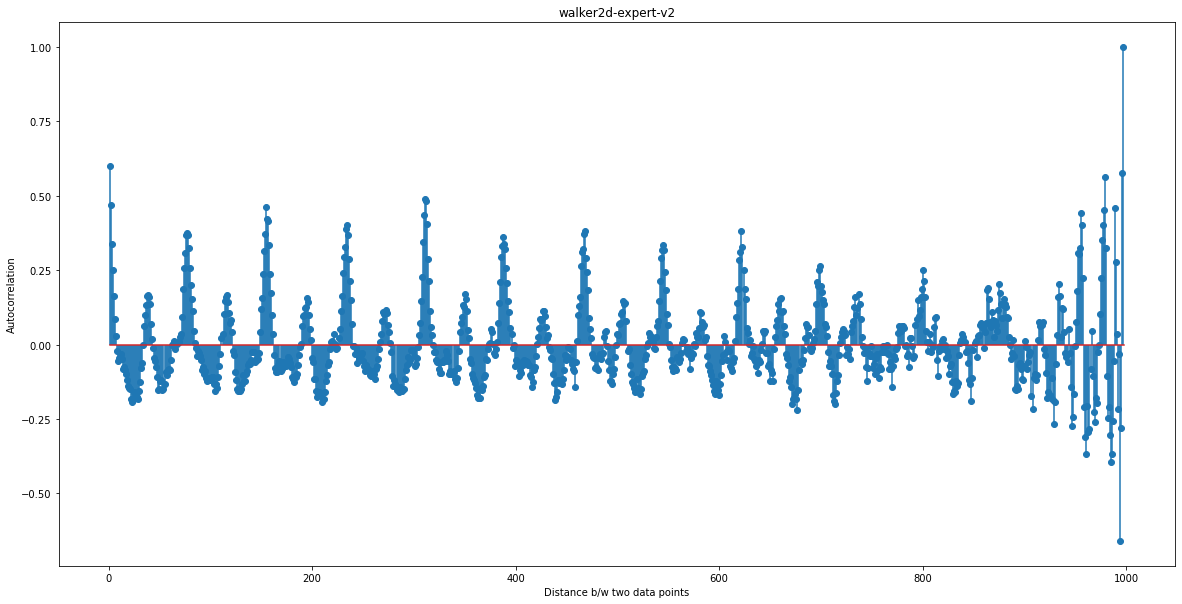

In [30]:
plot_correlogram(
    data_name='walker2d-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.15it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

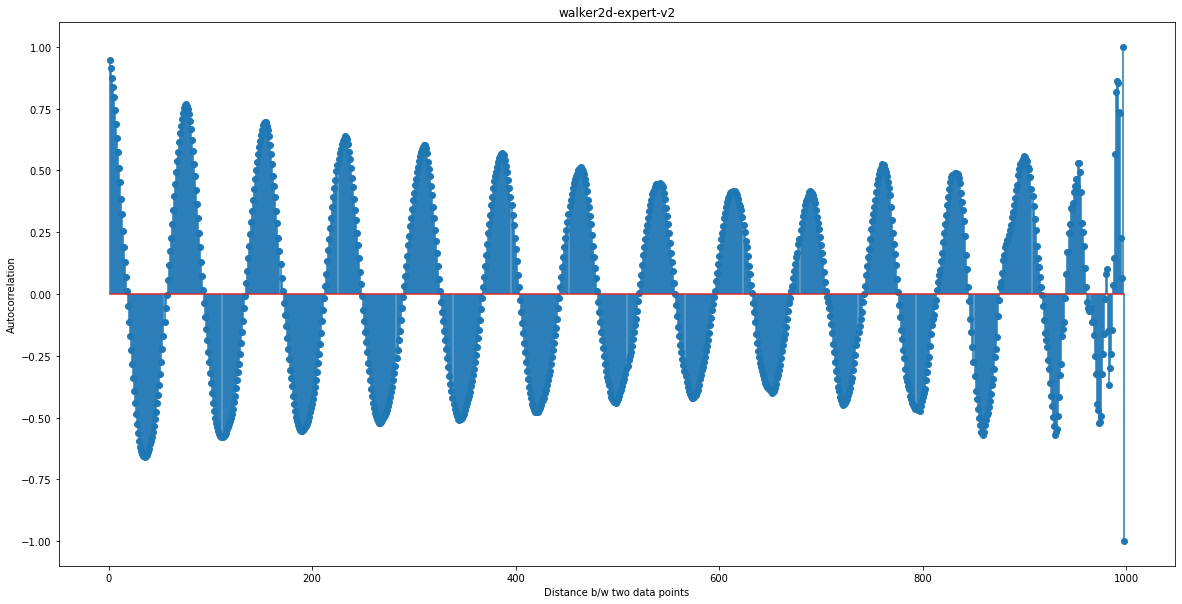

In [31]:
plot_correlogram(
    data_name='walker2d-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.19it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

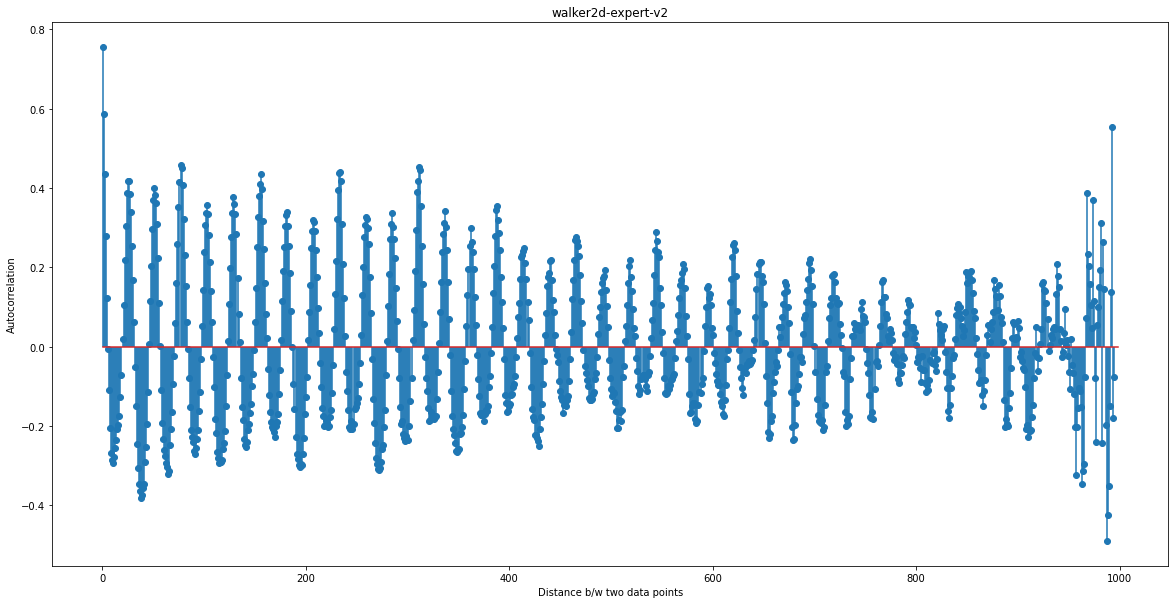

In [32]:
plot_correlogram(
    data_name='walker2d-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='observations')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.29it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

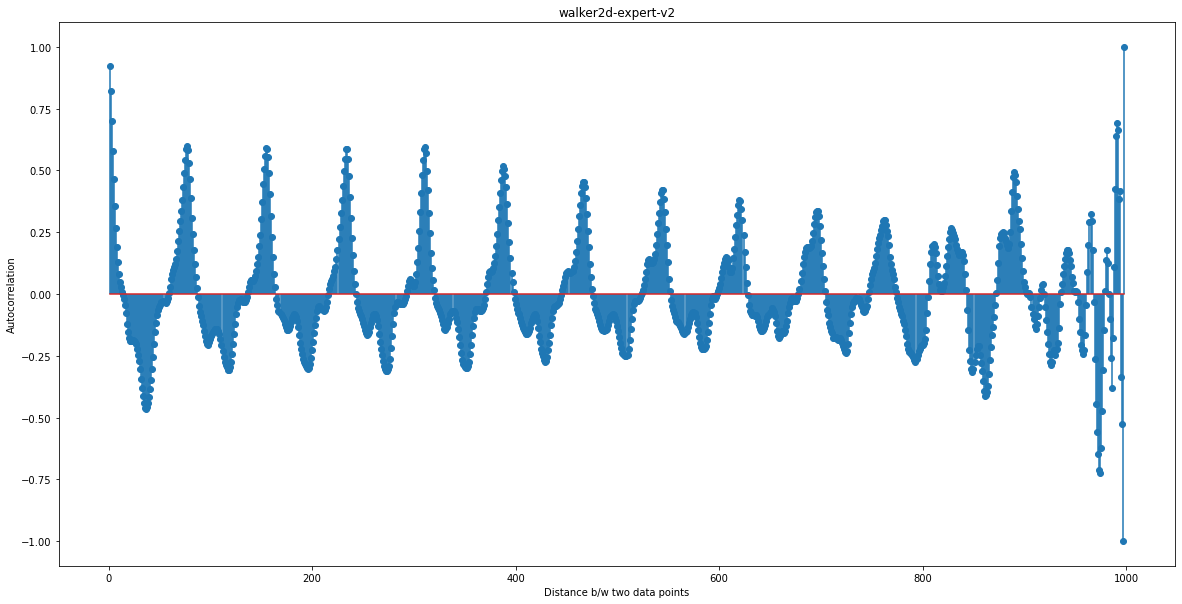

In [33]:
plot_correlogram(
    data_name='walker2d-expert-v2',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='observations')

### Maze2D

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `maze2d-large-v1` instead of the unversioned environment `maze2d-large`
  logger.warn(
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.83it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

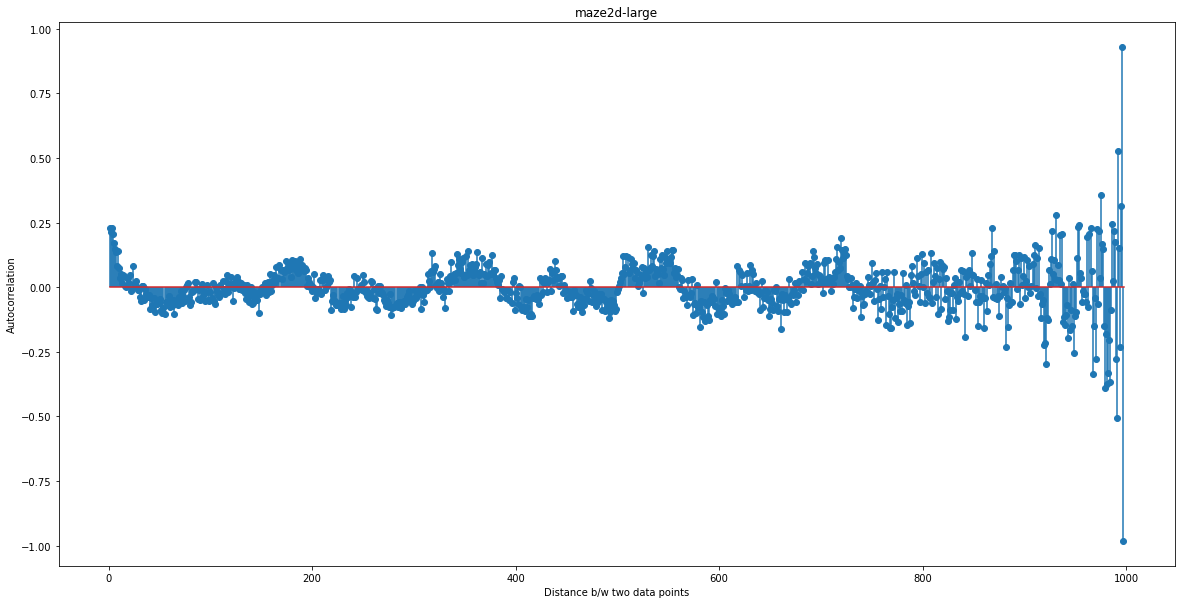

In [35]:
plot_correlogram(
    data_name='maze2d-large',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `maze2d-large-v1` instead of the unversioned environment `maze2d-large`
  logger.warn(
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.96it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

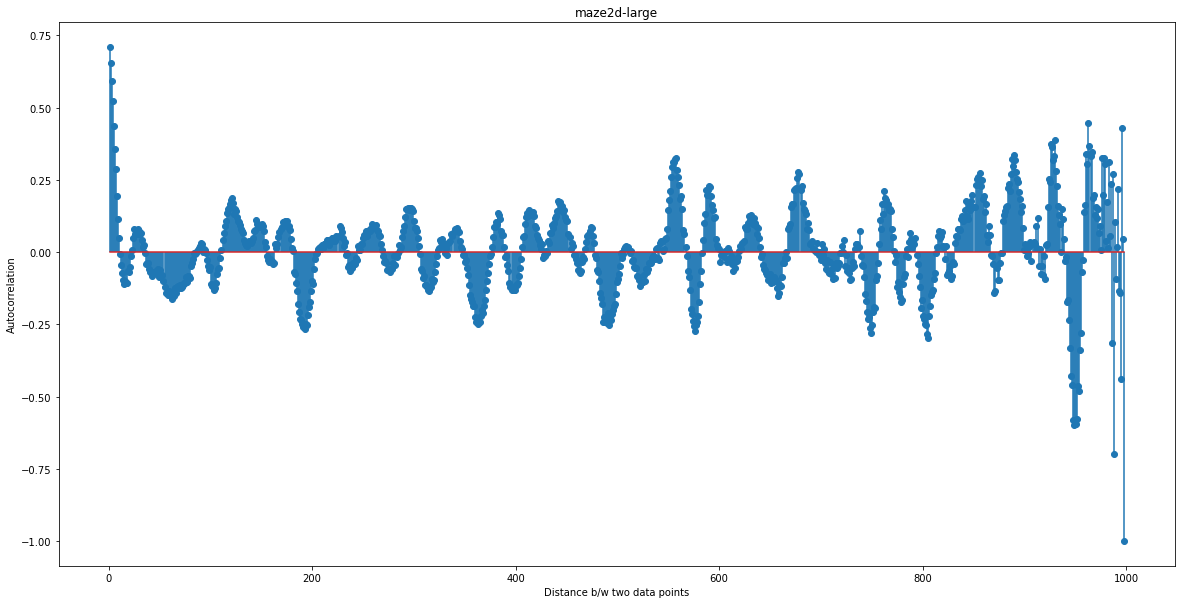

In [36]:
plot_correlogram(
    data_name='maze2d-large',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `maze2d-large-v1` instead of the unversioned environment `maze2d-large`
  logger.warn(
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.97it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

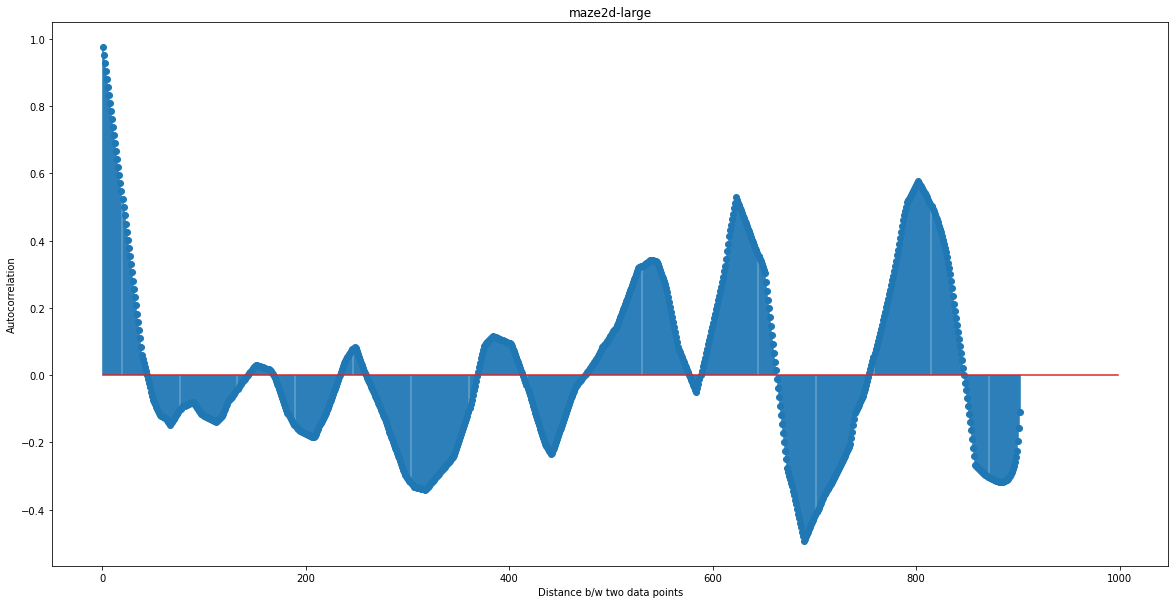

In [37]:
plot_correlogram(
    data_name='maze2d-large',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='observations')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `maze2d-large-v1` instead of the unversioned environment `maze2d-large`
  logger.warn(
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  7.98it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

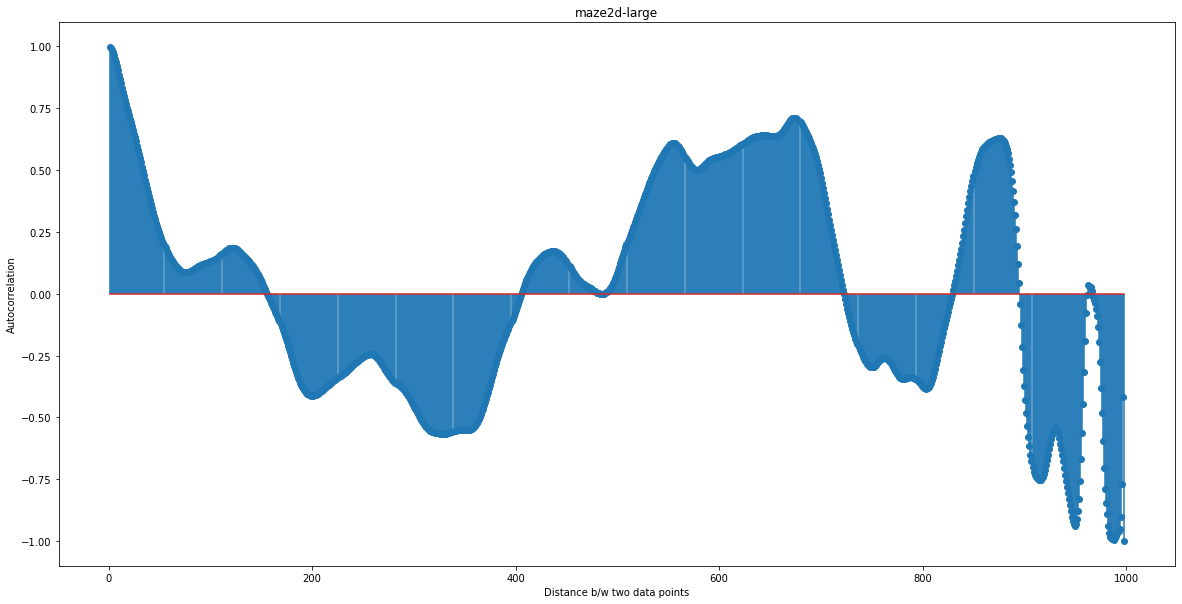

In [38]:
plot_correlogram(
    data_name='maze2d-large',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='observations')

## AntMaze

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `antmaze-large-play-v2` instead of the unversioned environment `antmaze-large-play`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (32.814046599837155, 24.781235859189273)


load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.12it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

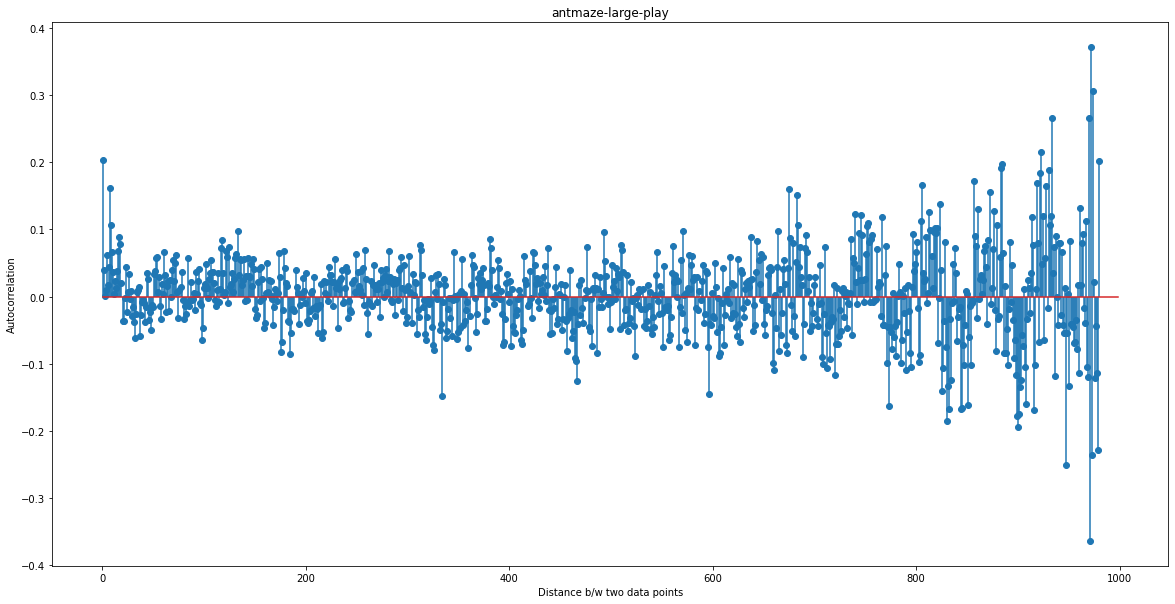

In [40]:
plot_correlogram(
    data_name='antmaze-large-play',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `antmaze-large-play-v2` instead of the unversioned environment `antmaze-large-play`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (33.337960988325065, 24.998455618930443)


load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.35it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

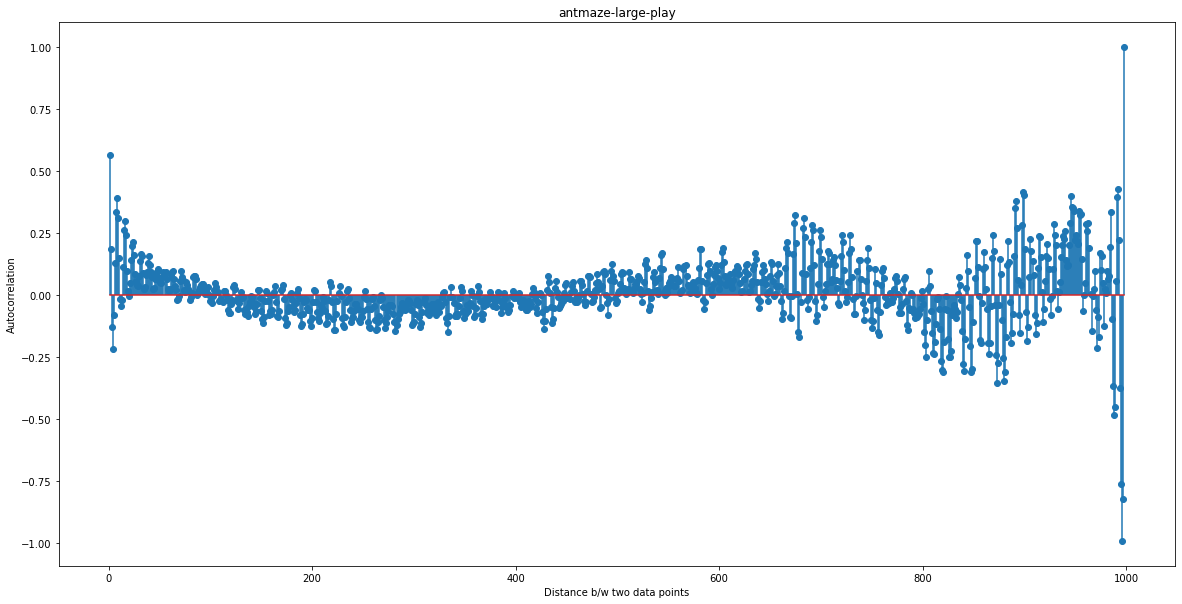

In [41]:
plot_correlogram(
    data_name='antmaze-large-play',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `antmaze-large-play-v2` instead of the unversioned environment `antmaze-large-play`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (32.23312320346175, 24.43005068642989)


load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.32it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

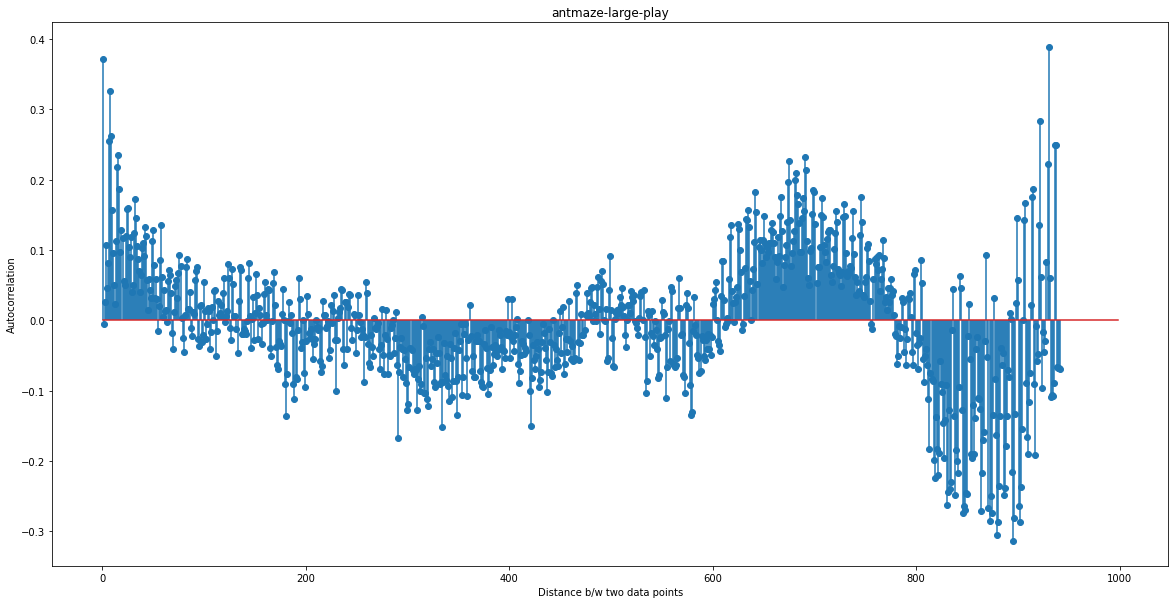

In [42]:
plot_correlogram(
    data_name='antmaze-large-play',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='observations')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `antmaze-large-play-v2` instead of the unversioned environment `antmaze-large-play`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (32.722066537418485, 24.902310154975883)


load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.34it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

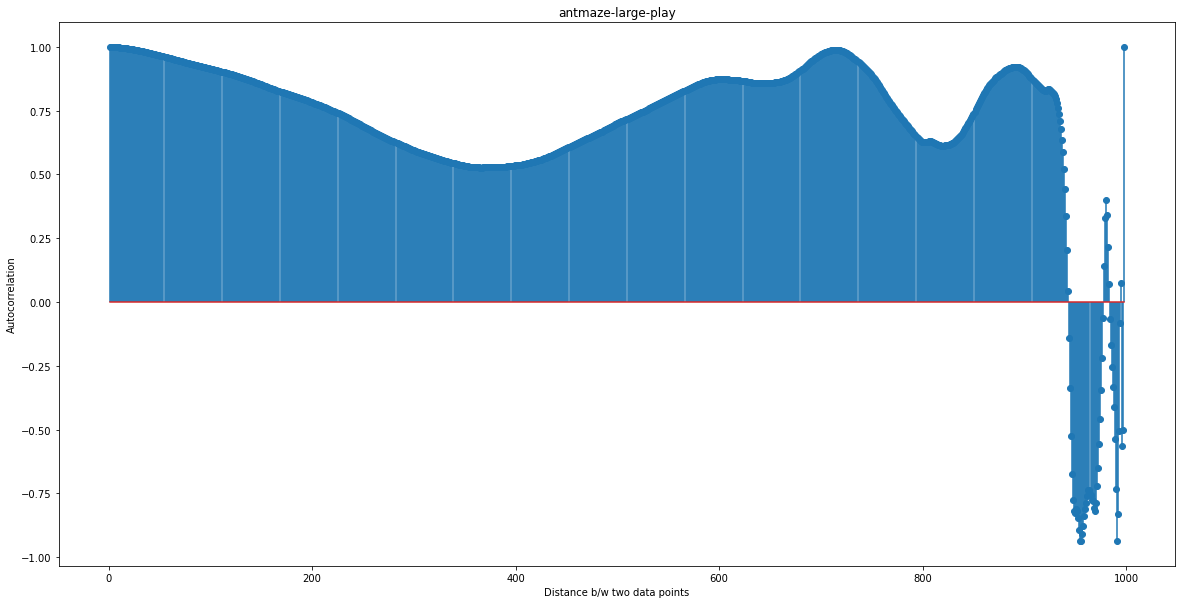

In [43]:
plot_correlogram(
    data_name='antmaze-large-play',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='observations')

## Adroit

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `relocate-expert-v1` instead of the unversioned environment `relocate-expert`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.63it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

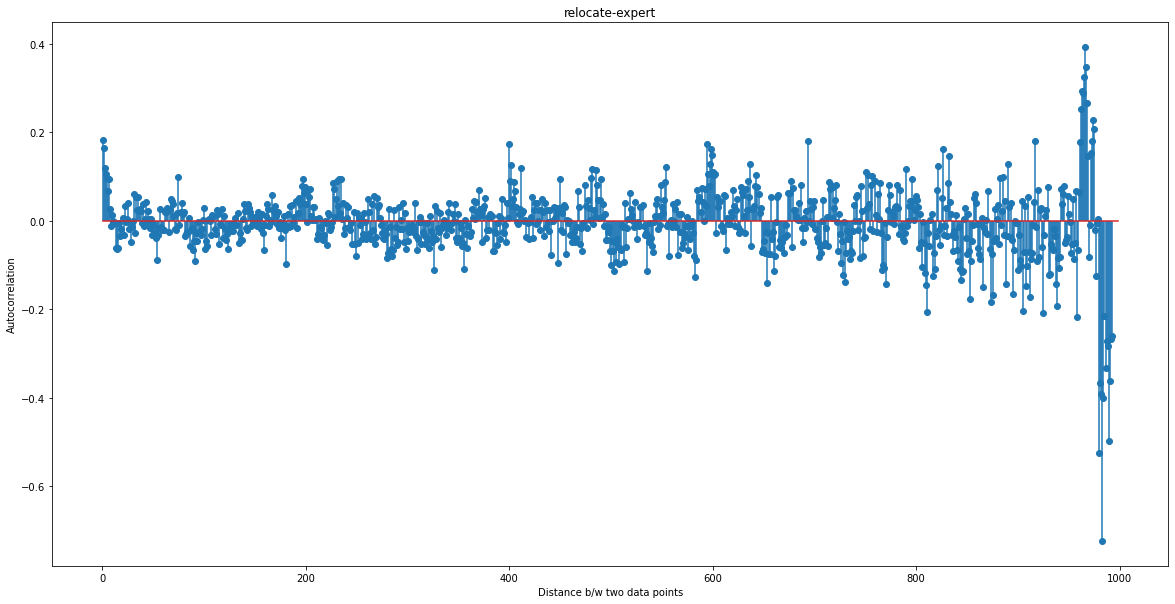

In [45]:
plot_correlogram(
    data_name='relocate-expert',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `relocate-expert-v1` instead of the unversioned environment `relocate-expert`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.88it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

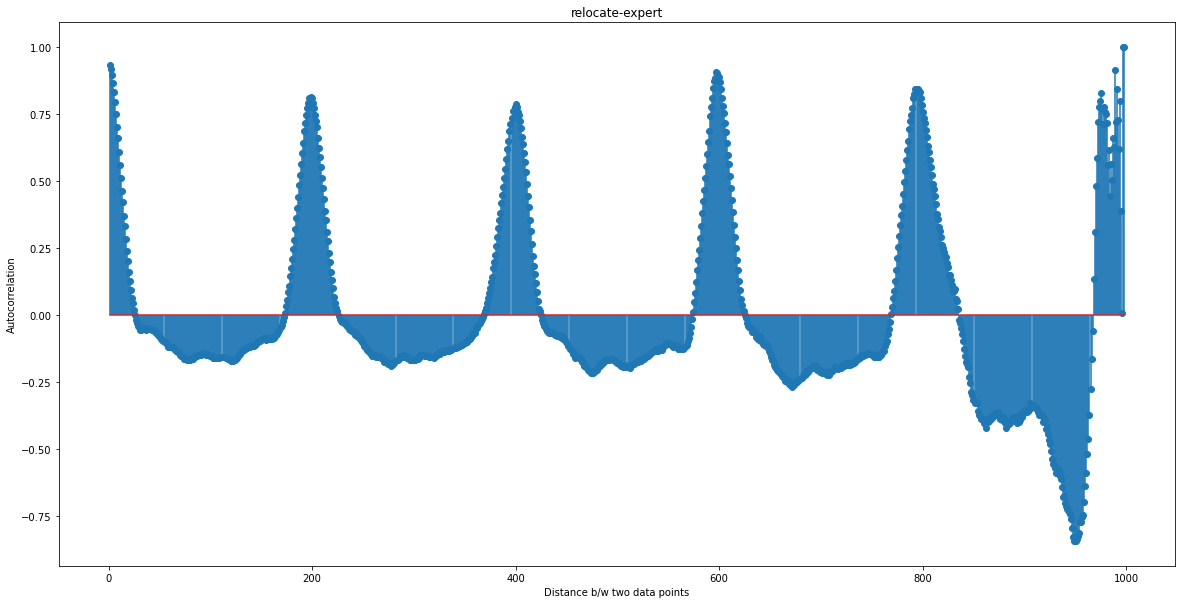

In [46]:
plot_correlogram(
    data_name='relocate-expert',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `relocate-expert-v1` instead of the unversioned environment `relocate-expert`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.82it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

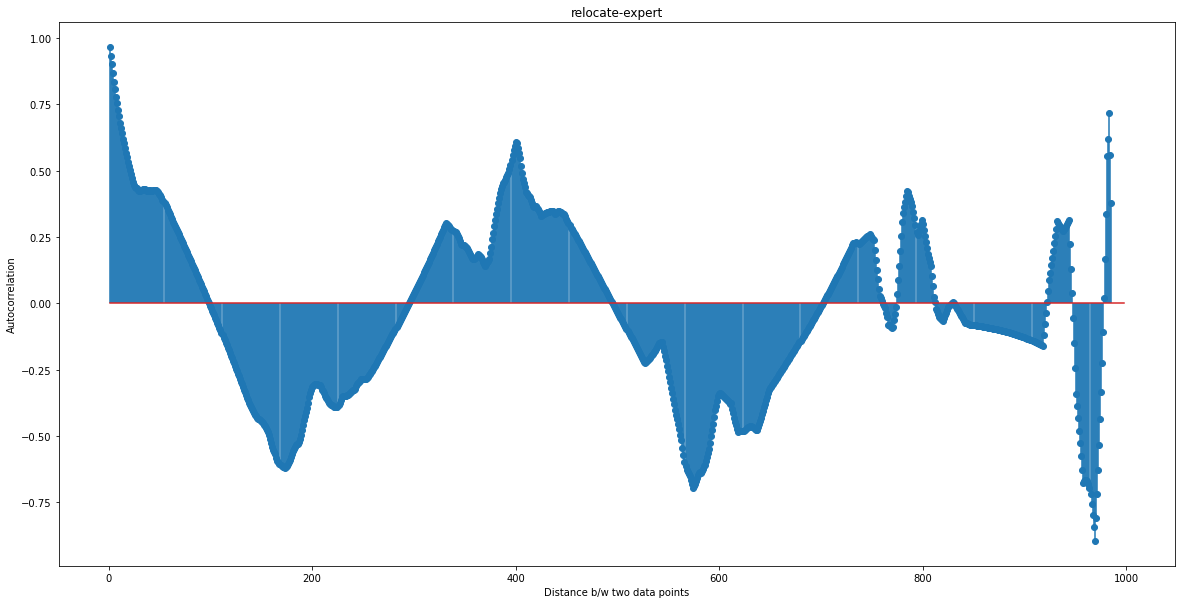

In [48]:
plot_correlogram(
    data_name='relocate-expert',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='observations')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `relocate-expert-v1` instead of the unversioned environment `relocate-expert`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.90it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

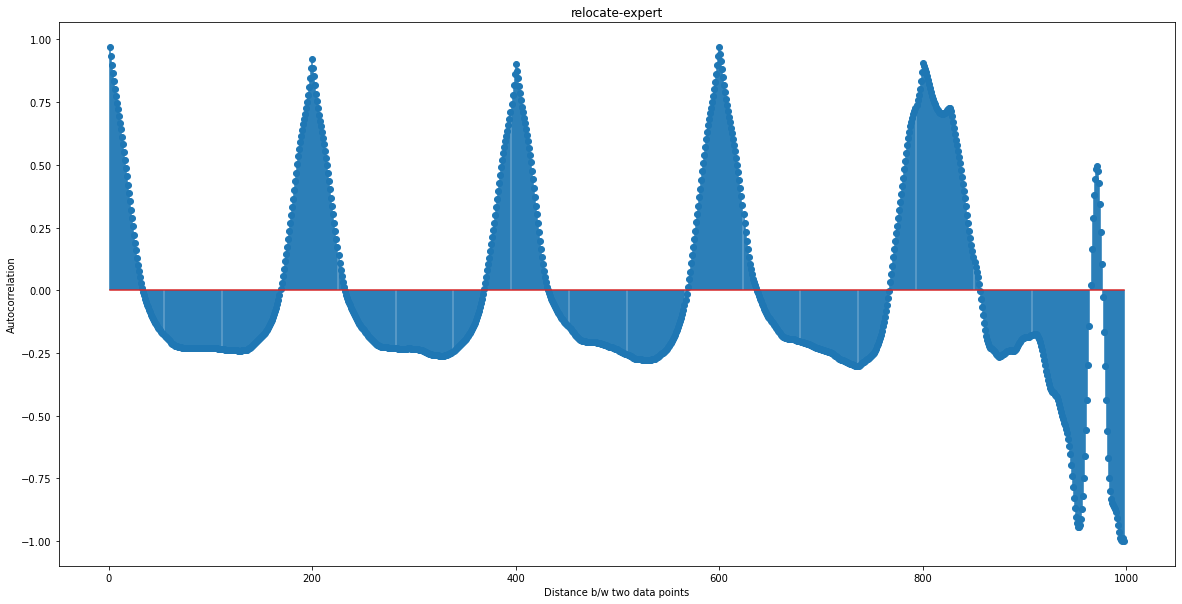

In [49]:
plot_correlogram(
    data_name='relocate-expert',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='observations')

## FrankaKitchen

Reading configurations for Franka
Initializing Franka sim


/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44.64it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

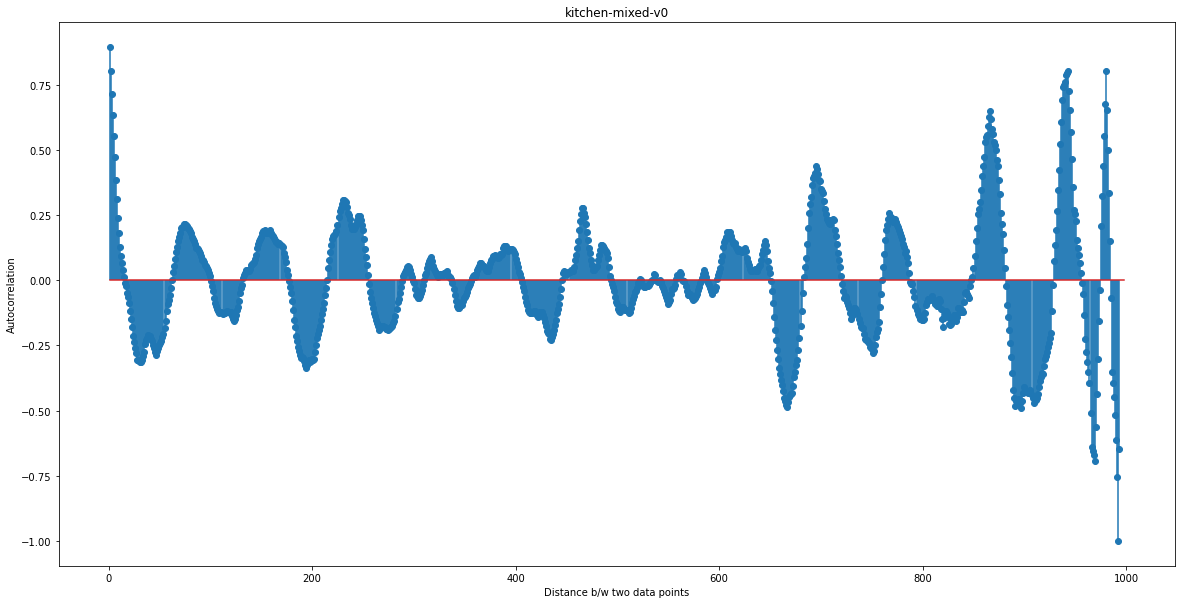

In [51]:
plot_correlogram(
    data_name='kitchen-mixed-v0',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='actions')

Reading configurations for Franka
Initializing Franka sim


/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.82it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

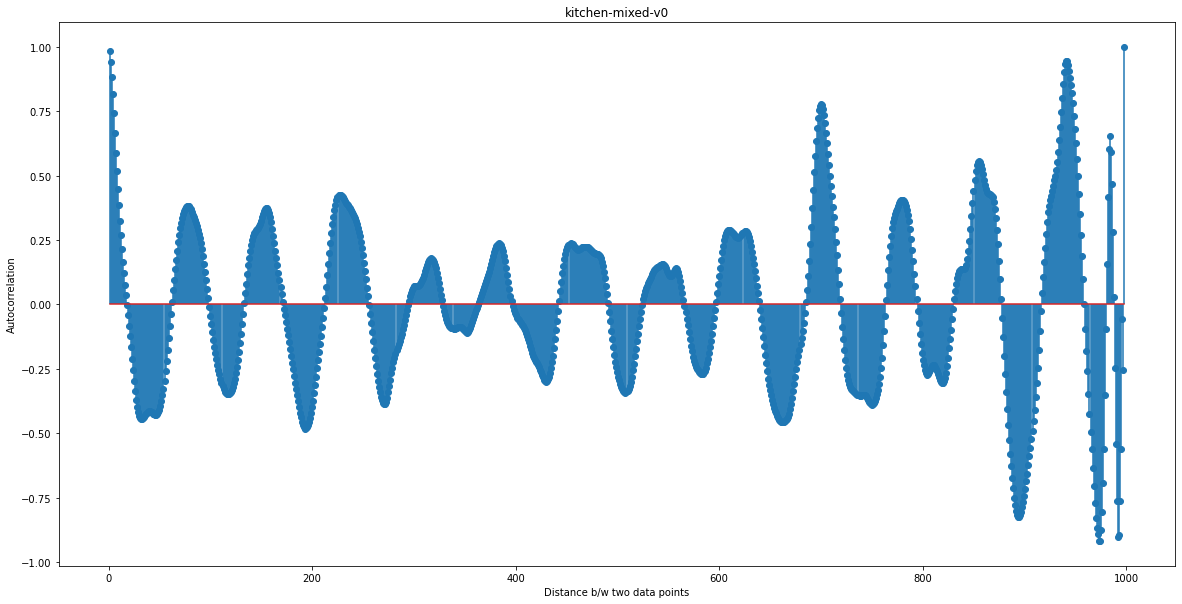

In [52]:
plot_correlogram(
    data_name='kitchen-mixed-v0',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='actions')

Reading configurations for Franka
Initializing Franka sim


/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44.97it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

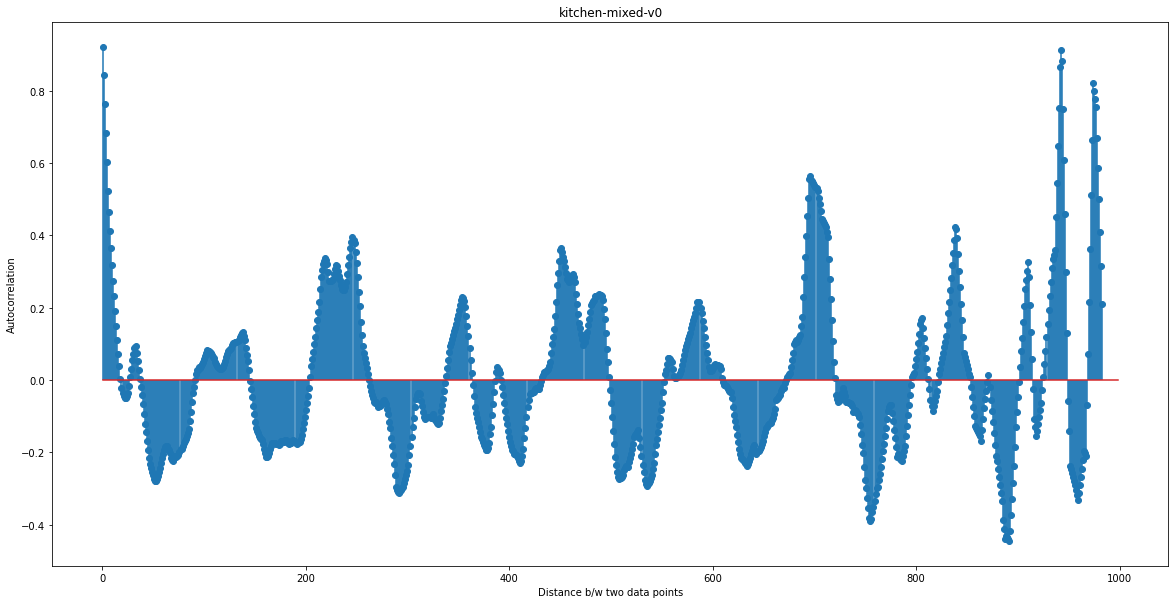

In [54]:
plot_correlogram(
    data_name='kitchen-mixed-v0',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='k-means',
    action_obs_reward='observations')

Reading configurations for Franka
Initializing Franka sim


/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.71it/s]


  0%|          | 0/998 [00:00<?, ?it/s]

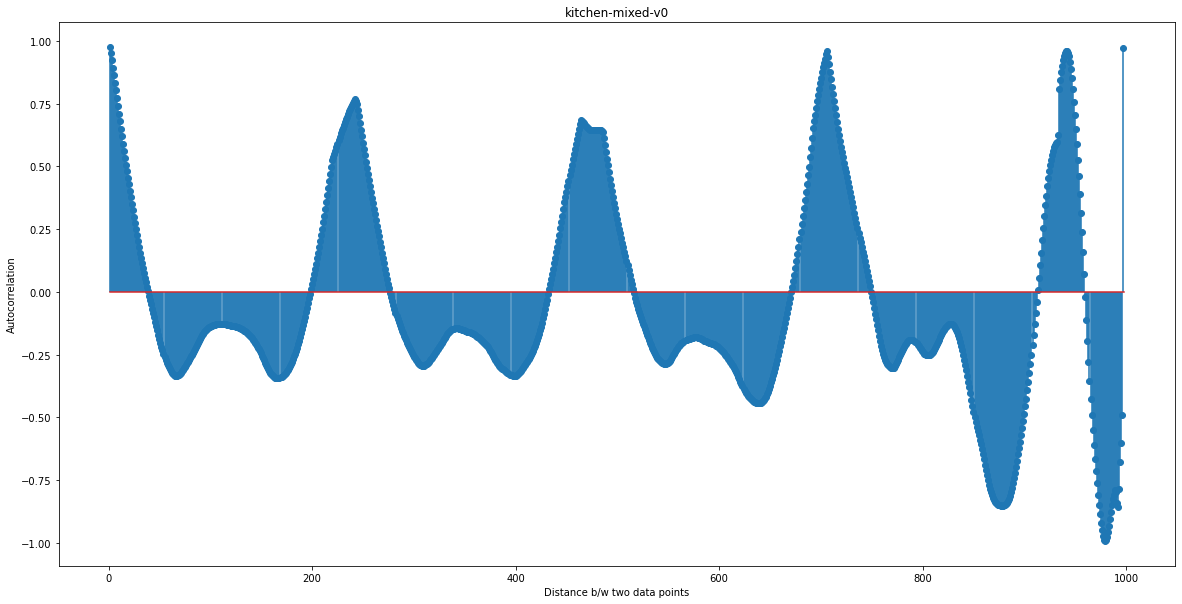

In [55]:
plot_correlogram(
    data_name='kitchen-mixed-v0',
    total_trajectory_len=1000,
    n_clusters=10,
    kmeans_pca='pca',
    action_obs_reward='observations')

In [56]:
!pwd

/Users/shiro/research/projects/rl-nlp/can-wikipedia-help-offline-rl/code/notebooks
